In [813]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load Dataset

In [814]:
data = pd.read_csv('/content/Bank Loan Prediction.csv')

In [815]:
print(data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [816]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


#Visualization(EDA)

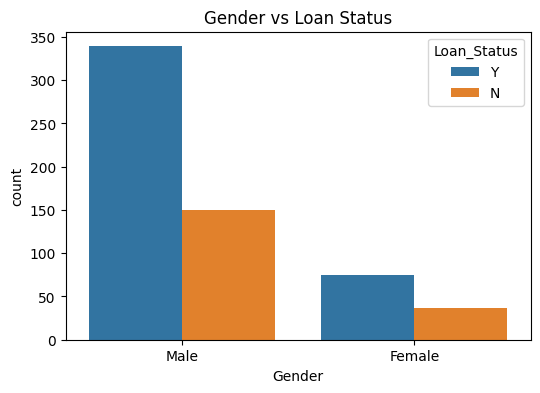

In [817]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Loan_Status', data=data)
plt.title("Gender vs Loan Status")
plt.show()


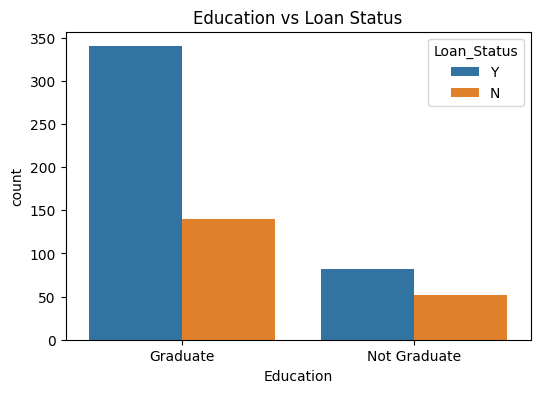

In [818]:
plt.figure(figsize=(6,4))
sns.countplot(x='Education', hue='Loan_Status', data=data)
plt.title("Education vs Loan Status")
plt.show()

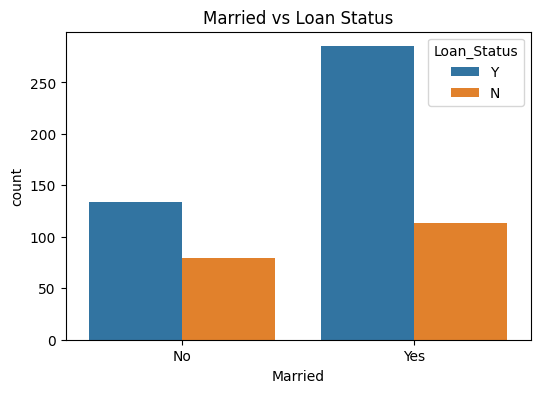

In [819]:
plt.figure(figsize=(6,4))
sns.countplot(x='Married', hue='Loan_Status', data=data)
plt.title("Married vs Loan Status")
plt.show()


#Data Preprocessing

In [820]:
data.drop(columns=['Loan_ID','Loan_Amount_Term','Credit_History'], inplace=True)

In [821]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,Urban,Y


Total Income

In [822]:
data['Total_Income'] = data.ApplicantIncome + data.CoapplicantIncome
data.drop(columns=['ApplicantIncome','CoapplicantIncome'], inplace=True)

Fill null and categorical value

In [823]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())

In [824]:
for col in ['Gender','Married','Dependents','Self_Employed']:
    data[col] = data[col].fillna(data[col].mode()[0])

In [825]:
data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
LoanAmount,0
Property_Area,0
Loan_Status,0
Total_Income,0


In [826]:
data['Dependents'] = data['Dependents'].replace('3+', 3).astype(int)

Binary Mapping

In [827]:
data['Education'] = data['Education'].replace(['Graduate','Not Graduate'], [1,0])
data['Loan_Status'] = data['Loan_Status'].replace(['Y','N'], [1,0])
data['Gender'] = data['Gender'].replace(['Male','Female'], [1,0])
data['Married'] = data['Married'].replace(['Yes','No'], [1,0])
data['Self_Employed'] = data['Self_Employed'].replace(['Yes','No'], [1,0])

/tmp/ipython-input-2834509041.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Education'] = data['Education'].replace(['Graduate','Not Graduate'], [1,0])
/tmp/ipython-input-2834509041.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Loan_Status'] = data['Loan_Status'].replace(['Y','N'], [1,0])
/tmp/ipython-input-2834509041.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To

In [828]:
data['Property_Area'] = data['Property_Area'].map({'Urban':2,'Semiurban':1,'Rural':0})

Convert numeric columns to int

In [829]:
for col in ['LoanAmount','Total_Income']:
    data[col] = data[col].astype(int)

#Train/Test Split

In [830]:
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Hybrid Sampling

In [831]:
from imblearn.combine import SMOTETomek

print("\nBefore Balancing (Training Data):\n", y_train.value_counts())

smt = SMOTETomek(random_state=42)
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

print("\nAfter Balancing (Training Data):\n", pd.Series(y_train_res).value_counts())


Before Balancing (Training Data):
 Loan_Status
1    337
0    154
Name: count, dtype: int64

After Balancing (Training Data):
 Loan_Status
1    272
0    272
Name: count, dtype: int64


#Feature Scaling

In [832]:
from sklearn.preprocessing import StandardScaler

In [833]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Model Training

In [834]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier

In [835]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [836]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier()

In [837]:
bag_model = BaggingClassifier()
bag_model.fit(X_train_scaled, y_train)

BaggingClassifier()

In [838]:
boost_model = GradientBoostingClassifier()
boost_model.fit(X_train_scaled, y_train)


GradientBoostingClassifier()

#Model Evaluting

In [839]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [840]:
def evaluate_model(name, model, x_train, y_train, x_test, y_test):
    print(f"\n📈 {name} Model Performance")

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {acc * 100:.2f}%")

    cv = cross_val_score(model, x_train, y_train, cv=5).mean()
    print(f"Cross Validation Accuracy: {cv * 100:.2f}%")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    return acc, cv, model

In [841]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = {}
for name, model in models.items():
    acc, cv, trained_model = evaluate_model(name, model, X_resampled, y_resampled, X_test, y_test)
    results[name] = {'Accuracy': acc, 'CV': cv, 'Model': trained_model}


📈 Decision Tree Model Performance
Test Accuracy: 92.68%
Cross Validation Accuracy: 67.28%

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        38
           1       0.97      0.92      0.95        85

    accuracy                           0.93       123
   macro avg       0.91      0.93      0.92       123
weighted avg       0.93      0.93      0.93       123

Confusion Matrix:
 [[36  2]
 [ 7 78]]

📈 Random Forest Model Performance
Test Accuracy: 93.50%
Cross Validation Accuracy: 69.04%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        38
           1       0.98      0.93      0.95        85

    accuracy                           0.93       123
   macro avg       0.92      0.94      0.93       123
weighted avg       0.94      0.93      0.94       123

Confusion Matrix:
 [[36  2]
 [ 6 79]]

📈 Bagging Classifier Model Performance


#Model Comparison

In [842]:
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test Accuracy (%)': [results[m]['Accuracy']*100 for m in results],
    'Cross Val Accuracy (%)': [results[m]['CV']*100 for m in results]
})
print("\n📊 Model Comparison:\n")
print(comparison_df.sort_values(by='Test Accuracy (%)', ascending=False))


📊 Model Comparison:

                Model  Test Accuracy (%)  Cross Val Accuracy (%)
1       Random Forest          93.495935               69.035948
0       Decision Tree          92.682927               67.275599
2  Bagging Classifier          88.617886               68.601307
3   Gradient Boosting          80.487805               68.447712


#Best Model Analysis

In [843]:
best_model_name = "Random Forest"
best_model = results[best_model_name]['Model']

print(f"✅ Best Model: {best_model_name} with Test Accuracy: {results[best_model_name]['Accuracy']*100:.2f}%")

✅ Best Model: Random Forest with Test Accuracy: 93.50%


Confusion Matrix

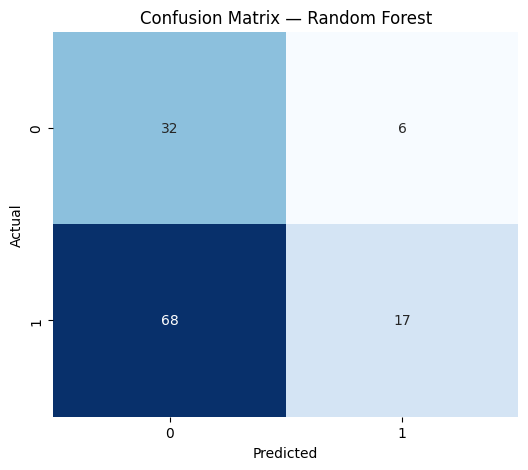

In [844]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_curve(y_true, y_pred, model_name="Model"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix — {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix_curve(y_test, y_pred_best, best_model_name)

Roc Curve

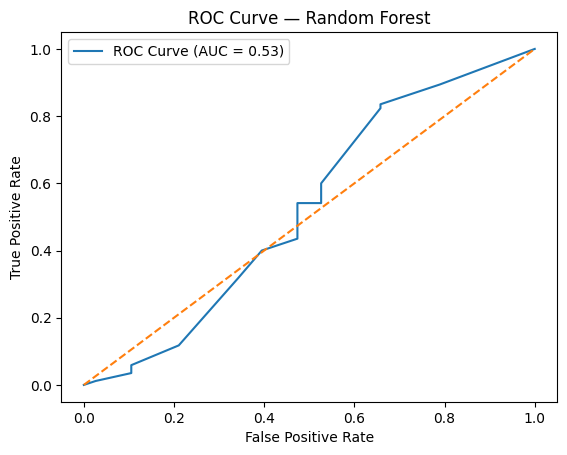

In [845]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train_res.columns)
y_prob = best_model.predict_proba(X_test_scaled_df)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve — {best_model_name}')
plt.legend()
plt.show()


In [846]:
pred_data = pd.DataFrame([['1','0','0','1','0','128','2','5849']],columns=['Gender','Married','Dependents','Education','Self_Employed','LoanAmount','Property_Area','Total_Income'])

In [847]:
pred_data = scaler.transform(pred_data)

In [848]:
pred_data = pred_data.astype(int)

#Save the model

In [849]:
import pickle as pk

In [852]:
pk.dump(model, open('model.pkl','wb'))

In [853]:
pk.dump(scaler,open('scaler.pkl','wb'))